In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
df = pd.read_table('census-data.csv', sep=', ', engine='python', header=None, )
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
             'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
             'hours-per-week', 'native-country', 'income']

In [11]:
df.columns = col_names

**Create a new column `income_binary` that has values `0` for people making `<=50k` and `1` with `>50k`**

In [13]:
df['income_binary'] = np.nan

In [14]:
df.loc[df['income'] == '>50K', 'income_binary'] = 1

In [15]:
df['income_binary'].fillna(0, inplace=True)

In [19]:
df['income_binary'].value_counts()

0.0    24720
1.0     7841
Name: income_binary, dtype: int64

In [21]:
df['income_binary'] = df['income_binary'].astype('category')

In [26]:
df['income'].nbytes

260488

In [27]:
df['income'] = df['income'].astype('category')

In [28]:
df['income'].nbytes

32577

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null category
income_binary     32561 non-null category
dtypes: category(2), int64(6), object(8)
memory usage: 3.5+ MB


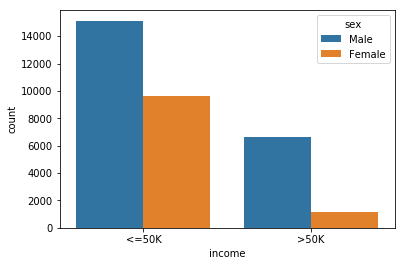

In [33]:
sns.countplot(x='income', hue='sex', data=df)

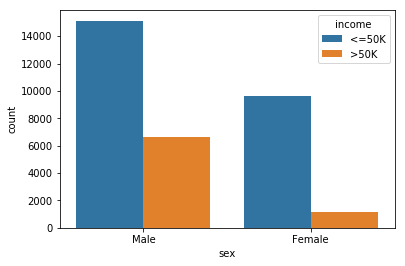

In [34]:
sns.countplot(x='sex', hue='income', data=df)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

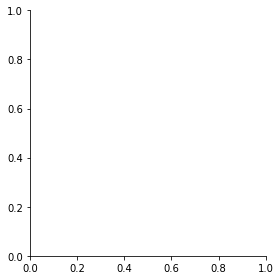

In [30]:
sns.factorplot(x='income', data=df, kind='bar')

* Bar plot (1 vs 0) in income variable
* Bar plot
* Dummy values

**Create a dummy variable "makes more than 50K" or "make less than 50K"**

In [36]:
pd.get_dummies(df['income']).head()

,<=50K,>50K
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [38]:
dff = pd.concat([df, pd.get_dummies(df['income'])], axis=1)

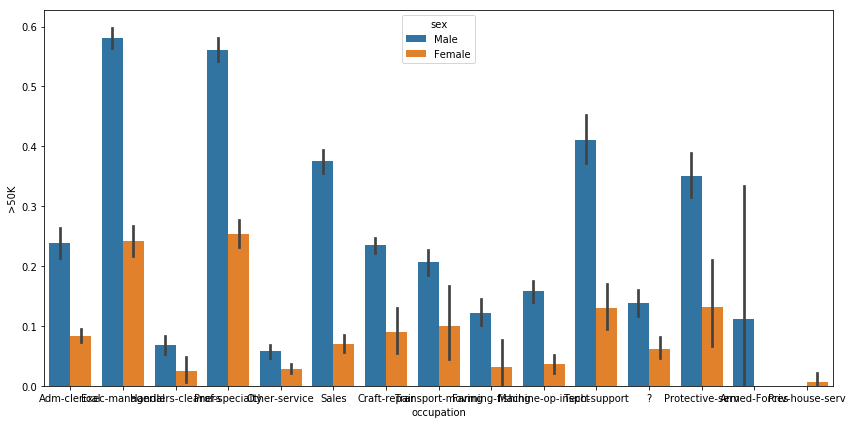

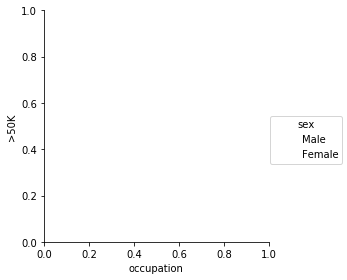

In [44]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.factorplot(x='occupation', y='>50K', hue='sex', data=dff, kind='bar', ax=ax)
fig.tight_layout()